In [2]:
import pandas as pd
import numpy as np
import os
import glob
from itertools import combinations
from collections import defaultdict
from random import sample
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_theme(style="whitegrid")
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

mapper={0:'Stand Still',1:'Treadmill Walk',2:'Treadmill Run',3:'Ground Walk',4:'Squat',5:'Lunge',6:'Jumping Jack'}

In [3]:
def get_attention_label(exp_num, test_num):
    main_np_dir = f'dataset/attention_tsne/EXP{exp_num}/test_{test_num}/channel_test_attention.npy'
    attention_label_dir = f'dataset/attention_tsne/EXP{exp_num}/test_{test_num}/channel_test_attention_scores.csv'
    main_np = np.load(main_np_dir)
    attention_label = pd.read_csv(attention_label_dir)
    attention_score = pd.DataFrame(main_np.squeeze())
    attention_score['label'] = attention_label['y_true']
    attention_score['label'] = attention_score['label'].map(mapper)
    attention_score['color'] = attention_score['label'].map({'Stand Still':'#FF5733', 'Treadmill Walk':'#FF0000', 'Treadmill Run':'#1E90FF', 'Ground Walk':'#4CBB17', 'Squat':'#8B008B', 'Lunge':'#00CED1', 'Jumping Jack':'#FF69B4'})
    return attention_score

In [4]:
depthwise_1020 = get_attention_label(1020, 3)
depthwise_cafo_1042 = get_attention_label(1042, 3)

In [5]:
depthwise_1020.mean().std()

/tmp/ipykernel_218714/2866295293.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depthwise_1020.mean().std()


0.06736496

In [6]:
depthwise_cafo_1042.mean().std()

/tmp/ipykernel_218714/1009151885.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depthwise_cafo_1042.mean().std()


0.07968683

In [7]:
depthwise_1020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,label,color
0,0.419245,0.200064,0.248462,0.386962,0.461726,0.386382,0.386965,0.524414,0.434384,0.548734,0.566689,0.524729,0.450145,0.471527,Stand Still,#FF5733
1,0.475379,0.209485,0.243615,0.386962,0.463915,0.400880,0.404200,0.549964,0.434906,0.542218,0.565368,0.529201,0.446810,0.445284,Stand Still,#FF5733
2,0.477293,0.207241,0.274386,0.386962,0.473791,0.397564,0.435953,0.524862,0.467022,0.562781,0.576265,0.530111,0.441614,0.462131,Stand Still,#FF5733
3,0.489743,0.207241,0.215290,0.388619,0.467821,0.395623,0.440934,0.519409,0.480237,0.565499,0.578043,0.528661,0.451258,0.454145,Stand Still,#FF5733
4,0.477293,0.204985,0.240298,0.521907,0.445708,0.403741,0.422755,0.523317,0.481054,0.520519,0.584082,0.539221,0.440764,0.475765,Stand Still,#FF5733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14274,0.599456,0.385321,0.480271,0.492375,0.432215,0.373459,0.457590,0.562915,0.489560,0.569681,0.573545,0.525281,0.439252,0.465229,Jumping Jack,#FF69B4
14275,0.612777,0.397656,0.479694,0.503581,0.428549,0.417387,0.456908,0.560684,0.485415,0.572564,0.575789,0.523576,0.438606,0.471184,Jumping Jack,#FF69B4
14276,0.544758,0.371336,0.482951,0.493783,0.420486,0.435370,0.471094,0.573357,0.497277,0.512060,0.580738,0.534305,0.453525,0.378291,Jumping Jack,#FF69B4
14277,0.537083,0.374874,0.460683,0.466761,0.406049,0.411287,0.469549,0.574257,0.491507,0.550573,0.573796,0.535334,0.449574,0.432753,Jumping Jack,#FF69B4


In [8]:
depthwise_1020.mean()

/tmp/ipykernel_218714/2328440931.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depthwise_1020.mean()


0     0.590887
1     0.387219
2     0.415497
3     0.498717
4     0.435933
5     0.371524
6     0.408095
7     0.530662
8     0.459681
9     0.534200
10    0.551671
11    0.520299
12    0.438059
13    0.439758
dtype: float32

In [9]:
# calculate pairwise distance between means of every feature
depthwise_1042_mean = depthwise_cafo_1042.mean()
depthwise_1042_dist = np.abs(depthwise_1020-depthwise_1042_mean)
depthwise_avg_dist = np.mean(depthwise_1042_dist, axis=0)
depthwise_avg_dist.mean()


def calculate_avg_dist(data):
    data_mean = data.mean()
    data_dist = np.abs(data-data_mean)
    data_avg_dist = np.mean(data_dist, axis=0)
    print(data_avg_dist.mean())

print(calculate_avg_dist(depthwise_1020))
print(calculate_avg_dist(depthwise_cafo_1042))

/tmp/ipykernel_218714/2336894186.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depthwise_1042_mean = depthwise_cafo_1042.mean()


0.02382694517395326
None
0.02547022553959063
None


/tmp/ipykernel_218714/2336894186.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_mean = data.mean()


In [10]:
depthwise_1020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,label,color
0,0.419245,0.200064,0.248462,0.386962,0.461726,0.386382,0.386965,0.524414,0.434384,0.548734,0.566689,0.524729,0.450145,0.471527,Stand Still,#FF5733
1,0.475379,0.209485,0.243615,0.386962,0.463915,0.400880,0.404200,0.549964,0.434906,0.542218,0.565368,0.529201,0.446810,0.445284,Stand Still,#FF5733
2,0.477293,0.207241,0.274386,0.386962,0.473791,0.397564,0.435953,0.524862,0.467022,0.562781,0.576265,0.530111,0.441614,0.462131,Stand Still,#FF5733
3,0.489743,0.207241,0.215290,0.388619,0.467821,0.395623,0.440934,0.519409,0.480237,0.565499,0.578043,0.528661,0.451258,0.454145,Stand Still,#FF5733
4,0.477293,0.204985,0.240298,0.521907,0.445708,0.403741,0.422755,0.523317,0.481054,0.520519,0.584082,0.539221,0.440764,0.475765,Stand Still,#FF5733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14274,0.599456,0.385321,0.480271,0.492375,0.432215,0.373459,0.457590,0.562915,0.489560,0.569681,0.573545,0.525281,0.439252,0.465229,Jumping Jack,#FF69B4
14275,0.612777,0.397656,0.479694,0.503581,0.428549,0.417387,0.456908,0.560684,0.485415,0.572564,0.575789,0.523576,0.438606,0.471184,Jumping Jack,#FF69B4
14276,0.544758,0.371336,0.482951,0.493783,0.420486,0.435370,0.471094,0.573357,0.497277,0.512060,0.580738,0.534305,0.453525,0.378291,Jumping Jack,#FF69B4
14277,0.537083,0.374874,0.460683,0.466761,0.406049,0.411287,0.469549,0.574257,0.491507,0.550573,0.573796,0.535334,0.449574,0.432753,Jumping Jack,#FF69B4


(0.0, 0.8)

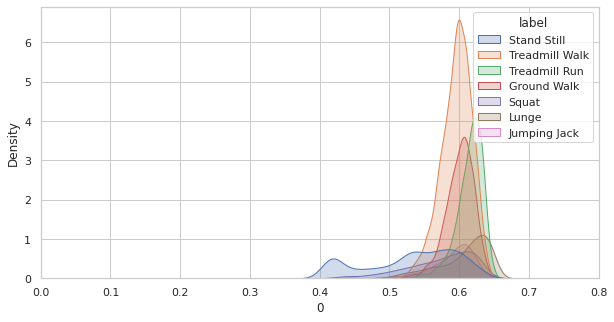

In [11]:
depthwise_1020_melt = depthwise_1020.iloc[:,:14].melt()[['value']]
cafo_melt = depthwise_cafo_1042.iloc[:,:14].melt()[['value']]
# kde plot 
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=depthwise_1020, x=0, hue=depthwise_1020['label'], fill=True, ax=ax)
# set x axis limit
ax.set_xlim(0, 0.8)

(0.0, 0.6)

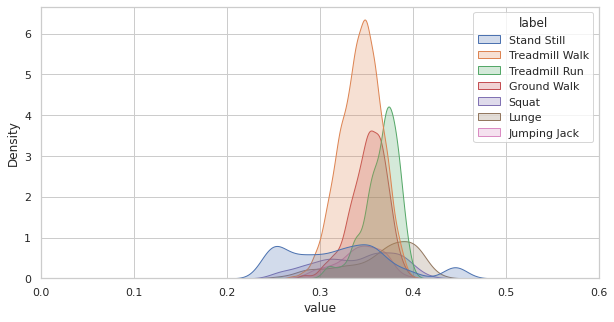

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=cafo_melt, x="value", hue=depthwise_cafo_1042['label'], fill=True, ax=ax)
# set x axis limit
ax.set_xlim(0, 0.6)

0
9


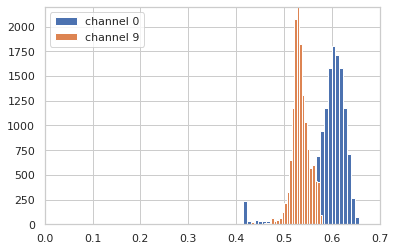

In [13]:
for i in [0,9]:
    print(i)
    plt.hist(depthwise_1020[i], bins=30, label=f'channel {i}')
    # set x lim
    # legend
    plt.legend()
    plt.xlim(0, 0.7)
    plt.ylim(0, 2200)
    # plt.hist(depthwise_cafo_1042[i], bins=100, alpha=0.5, label=f'channel {i}', color='b')
    # plt.show()

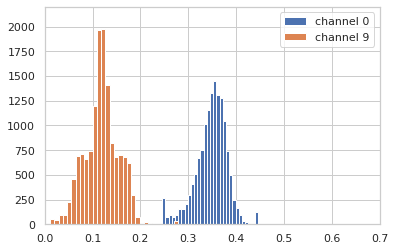

In [14]:
for i in [0,9]:
    plt.hist(depthwise_cafo_1042[i], bins=30, label=f'channel {i}')
    plt.legend()
    plt.xlim(0, 0.7)
    plt.ylim(0, 2200)
    # plt.hist(depthwise_cafo_1042[i], bins=100, alpha=0.5, label=f'channel {i}', color='b')
    # plt.show()

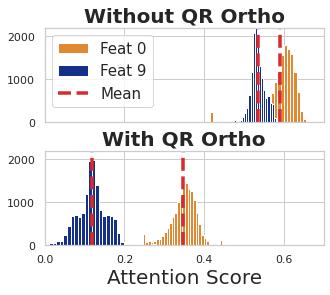

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(5, 4),
                         sharex=True)
fig.subplots_adjust(hspace=0.3)
# show feature 0,9
linewidth = 3.5
axes[0].hist(depthwise_1020[0], bins=30, label=f'Feat {0}', color='#E28832')
axes[0].hist(depthwise_1020[9], bins=30, label=f'Feat {9}', color='#14308B')

barcolor = '#D92B2E'
# place vertical line on the mean of each feature
axes[0].axvline(depthwise_1020[0].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[0].axvline(depthwise_1020[9].mean(), color=barcolor, linestyle='--', linewidth=linewidth, label='Mean')
axes[0].legend(fontsize=15)
# set axes title
axes[0].set_title('Without QR Ortho', fontsize=20, fontweight='bold')

axes[1].hist(depthwise_cafo_1042[0], bins=30, label=f'Feat {0}', color='#E28832')
axes[1].hist(depthwise_cafo_1042[9], bins=30, label=f'Feat {9}', color='#14308B')
axes[1].axvline(depthwise_cafo_1042[0].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[1].axvline(depthwise_cafo_1042[9].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[1].set_title('With QR Ortho', fontsize=20, fontweight='bold')

axes[1].set_xlabel('Attention Score', fontsize=20)

for i in range(2):
    axes[i].set_xlim(0, 0.7)
    axes[i].set_ylim(0, 2200)
    
    axes[i].set_xticks([0.0, 0.2, 0.4, 0.6], fontsize= 24)
# plt.savefig('results/qr_separablity/attention_score_separability.png', dpi=300, bbox_inches='tight')

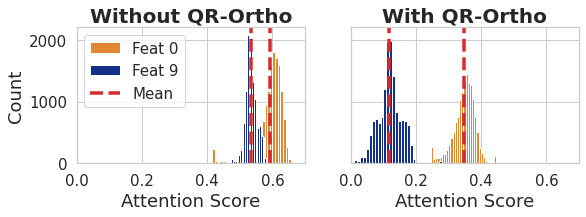

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5),
                         sharey=True, sharex=True)
# fig.subplots_adjust(wspace=0.3)
# show feature 0,9
linewidth = 3.5
axes[0].hist(depthwise_1020[0], bins=30, label=f'Feat {0}', color='#E28832')
axes[0].hist(depthwise_1020[9], bins=30, label=f'Feat {9}', color='#14308B')

barcolor = '#D92B2E'
# place vertical line on the mean of each feature
axes[0].axvline(depthwise_1020[0].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[0].axvline(depthwise_1020[9].mean(), color=barcolor, linestyle='--', linewidth=linewidth, label='Mean')
axes[0].legend(fontsize=15)
# set axes title
axes[0].set_title('Without QR-Ortho', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=18)


axes[1].hist(depthwise_cafo_1042[0], bins=30, label=f'Feat {0}', color='#E28832')
axes[1].hist(depthwise_cafo_1042[9], bins=30, label=f'Feat {9}', color='#14308B')
axes[1].axvline(depthwise_cafo_1042[0].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[1].axvline(depthwise_cafo_1042[9].mean(), color=barcolor, linestyle='--', linewidth=linewidth)
axes[1].set_title('With QR-Ortho', fontsize=20, fontweight='bold')

#fig.text(0.5, -0.05, 'Attention Score', ha='center', fontsize=20)

for i in range(2):
    axes[i].set_xlim(0, 0.7)
    axes[i].set_ylim(0, 2200)
    axes[i].tick_params(axis='x', labelsize=15)  # Adjust font size for x ticks
    axes[i].tick_params(axis='y', labelsize=15)  #
    axes[i].set_xticks([0.0, 0.2, 0.4, 0.6])
    axes[i].set_xlabel('Attention Score', fontsize=18)

plt.savefig('results/qr_separablity/attention_score_separability.png', dpi=300, bbox_inches='tight')